In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%%time
from dataframe_processor import process_df

Wall time: 1min 27s


In [17]:
df = pd.read_csv("FullAnnotatedSet.csv", index_col="Unnamed: 0")

In [18]:
df.columns

Index(['id', 'Sentence (original)', 'Sentence (changed)', 'Right answer',
       'Error type', 'Error type+', 'Level (Hand)', 'path_in_REALEC',
       'Sentence', 'Error span'],
      dtype='object')

In [6]:
%%time
df_processed = process_df(df, indicate_handlers=True)

c:\users\k1l77\desktop\182e~1\term_p~1\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\k1l77\desktop\182e~1\term_p~1\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\k1l77\desktop\182e~1\term_p~1\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████████████████████████████████████████████████████████████

Wall time: 24.1 s


C:\Users\k1l77\Desktop\QuestionLevelAnnotator\dataframe_processor.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero["predicted"] = df_zero["predicted"].apply(lambda x: int(x.split("_")[1]))


In [7]:
df_processed

,id,Sentence (original),Sentence (changed),Right answer,Error type,Error type+,Level (Hand),path_in_REALEC,Sentence,Error span,predicted,Rule
0,36478,The graph given to us represents the informati...,The graph represents information about changes...,the world's investment,Articles,Articles,2,https://realec.org/index.xhtml#/exam/Exam2016/...,The graph represents information about changes...,world's investment,2,DeterminersHandler
1,67749,"Moreover, they need money to feed their child...",NaN,this money,Agreement_errors,Countable_uncountable,1,https://realec.org/index.xhtml#/exam/Exam2017/...,"Moreover, they need money to feed their child...",these money,1,AgreementHandler
2,4238,Globalization creates an important basis for ...,Globalization creates an important basis for ...,ecological ones,Absence_comp_sent,Punctuation,3,https://realec.org/index.xhtml#/2012-2014/esl_...,Globalization creates an important basis for ...,ecological,3,TagOnlyHandler
4,50904,If in North Africa and South Asia there <b>is...,If in North Africa and South Asia there <b>is...,were,Agreement_errors //Tense_choice,Agreement_errors,3,https://realec.org/index.xhtml#/exam/Exam2017/...,If in North Africa and South Asia there <b>is...,is,1,Supervised classif
5,61808,That is <b>really hard task</b> for people to ...,That is <b>really hard task</b> for people to ...,a really hard task,Articles,Articles,2,https://realec.org/index.xhtml#/exam/Exam2017/...,That is <b>really hard task</b> for people to ...,really hard task,2,DeterminersHandler
...,...,...,...,...,...,...,...,...,...,...,...,...
738,43202,In the Middle East and Latin America the rate...,NaN,"from 6,8 to 5,8",Absence_comp_sent,Prepositions,3,https://realec.org/index.xhtml#/exam/Exam2017/...,In the Middle East and Latin America the rate...,"6,8 to 5,8",3,TagOnlyHandler
740,68578,A more detailed look reveals that there are s...,A more detailed look reveals that there are s...,to,Prepositions,suggestion,3,https://realec.org/index.xhtml#/exam/Exam2017/...,A more detailed look reveals that there are s...,from,3,TagOnlyHandler
741,80835,"Firstly, I believe that space could <b>wait</...","Firstly, I believe that space could wait <b>a...",until,Linking_device OR Conjunctions,Prepositions,3,https://realec.org/index.xhtml#/exam/Exam2017/...,"Firstly, I believe that space could wait <b>a...","a time, when",3,Supervised classif
742,67232,<b>Having paid</b> more attention to it we wi...,NaN,By paying,Structure_confusion,Participial_constr,3,https://realec.org/index.xhtml#/exam/Exam2017/...,<b>Having paid</b> more attention to it we wi...,Having paid,1,Supervised classif


In [8]:
full_names = {
    "TagOnlyHandler": "TagOnlyHandler",
    "CategoryConfusionH": "CategoryConfusionHandler",
    "StandardWordOrderH": "StandardWordOrderHandler",
    "TenseChoiceHandler": "TenseChoiceHandler",
    "AgreementHandler": "AgreementHandler",
    "LexicalErrorHandle": "LexicalErrorHandler",
    "Supervised classif": "Supervised classifier",
    "DeterminersHandler": "DeterminersHandler"
}

In [9]:
[key for key in df['Rule'].value_counts().index]

['TagOnlyHandler',
 'DeterminersHandler',
 'Supervised classif',
 'LexicalErrorHandle',
 'AgreementHandler',
 'TenseChoiceHandler',
 'CategoryConfusionH',
 'StandardWordOrderH']

In [10]:
color_code={'TagOnlyHandler':"#1f77b4",
            'DeterminersHandler':"#ff7f0e",
            'Supervised classifier':"#2ca02c",
            'LexicalErrorHandler':"#d62728",
            'AgreementHandler':"#9467bd",
            'TenseChoiceHandler':"#8c564b",
            'CategoryConfusionHandler':"#e377c2",
            'StandardWordOrderHandler':"#7f7f7f"}

In [16]:
df.columns

Index(['id', 'Sentence (original)', 'Sentence (changed)', 'Right answer',
       'Error type', 'Error type+', 'Level (Hand)', 'path_in_REALEC',
       'Sentence', 'Error span', 'predicted', 'Rule'],
      dtype='object')

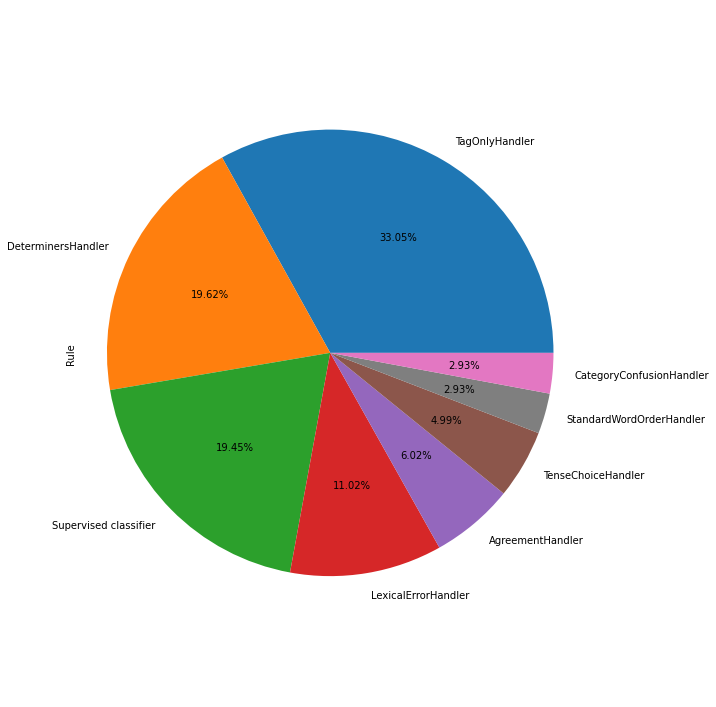

In [19]:
counts1 = df_processed["Rule"].apply(lambda x: full_names[x]).value_counts()
plt.figure(figsize=(10,10))
counts1.plot.pie(autopct='%1.2f%%', colors = [color_code[x] for x in counts1.index ])
plt.axis("equal")
plt.tight_layout()
plt.savefig("RuleDistribution.png")

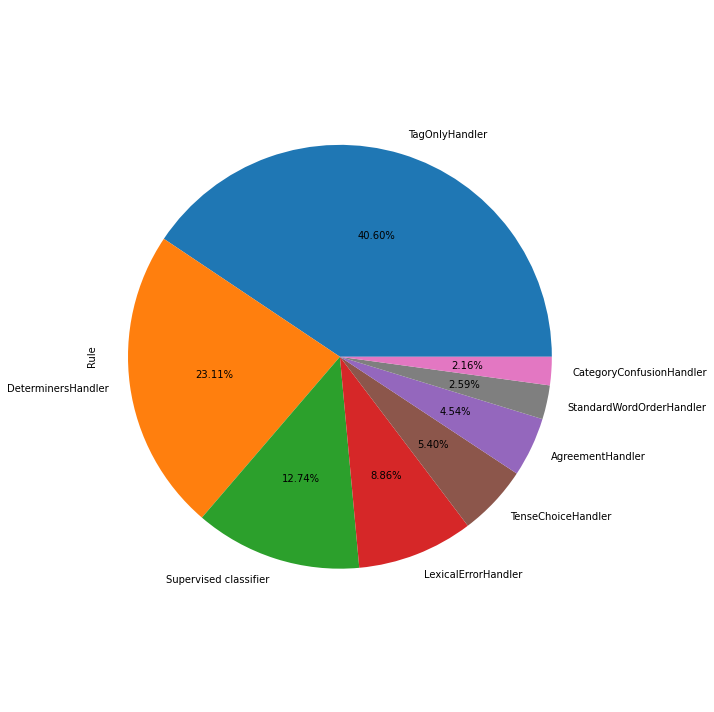

In [20]:
counts2 = df_processed.loc[df_processed["predicted"]==df["Level (Hand)"]]["Rule"].apply(lambda x: full_names[x]).value_counts()
plt.figure(figsize=(10,10))
counts2.plot.pie(autopct='%1.2f%%', colors = [color_code[x] for x in counts2.index ])
plt.axis("equal")
plt.tight_layout()
plt.savefig("RuleDistributionTrue.png")

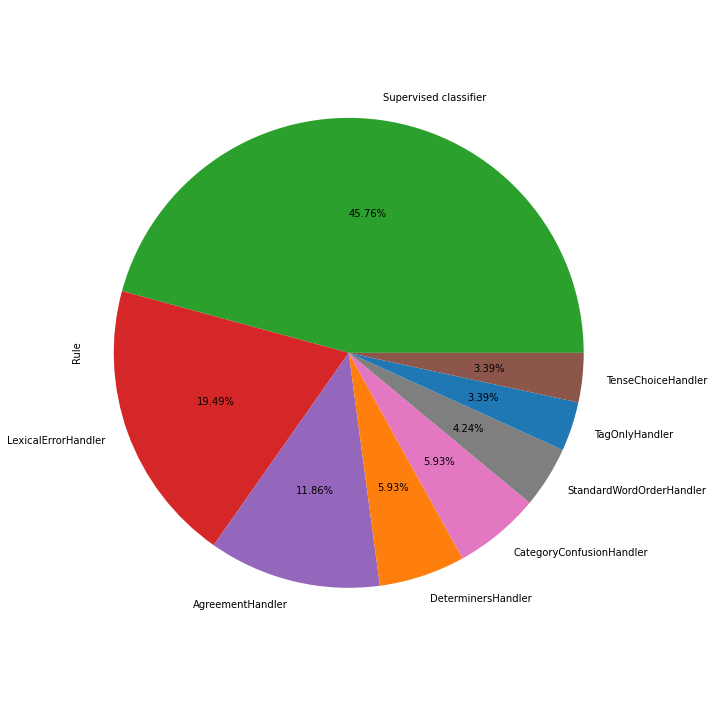

In [21]:
counts3 = df_processed.loc[df_processed["predicted"]!=df_processed["Level (Hand)"]]["Rule"].apply(lambda x: full_names[x]).value_counts()
plt.figure(figsize=(10,10))
counts3.plot.pie(autopct='%1.2f%%', colors = [color_code[x] for x in counts3.index ])
plt.axis("equal")
plt.tight_layout()
plt.savefig("RuleDistributionFalse.png")

Неиспользованные - ZeroVerbNegationHandler и DeterminerNounAgreementHandler

Сделаем словари того, насколько качественно каждый Хэндлер распознаёт уровень:

In [39]:
rule_accuracies = dict()

for rule, rule_group in df_processed.groupby("Rule"):
    rule = full_names[rule]
    rule_accuracies[rule] = len(rule_group.loc[rule_group["predicted"]==rule_group["Level (Hand)"]])/len(rule_group)

In [40]:
rule_accuracies = pd.Series(rule_accuracies).sort_values(ascending=False)

In [41]:
rule_accuracies

TagOnlyHandler              0.979167
DeterminersHandler          0.938596
TenseChoiceHandler          0.862069
StandardWordOrderHandler    0.705882
LexicalErrorHandler         0.640625
AgreementHandler            0.600000
CategoryConfusionHandler    0.588235
Supervised classifier       0.522124
dtype: float64

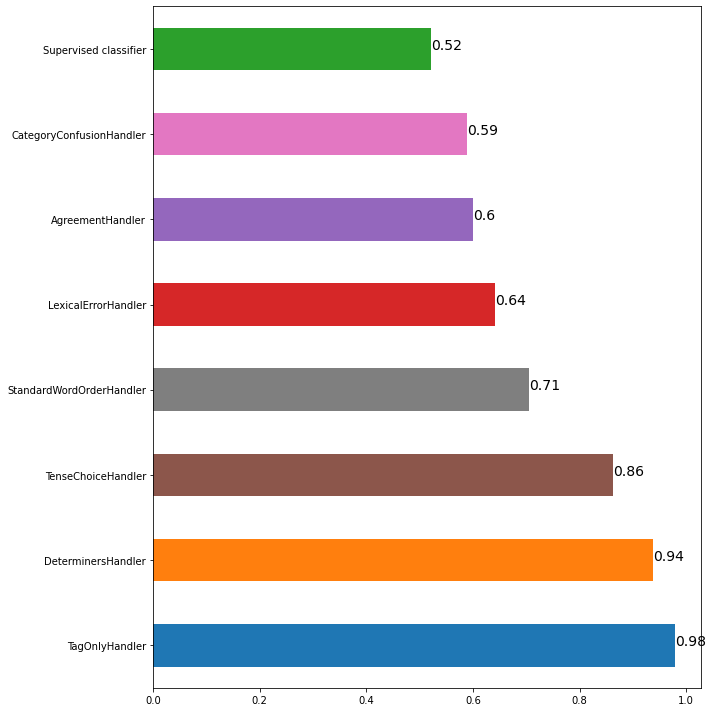

In [64]:
plt.figure(figsize=(10,10))
rule_accuracies.plot.barh(color=[color_code[x] for x in rule_accuracies.index])

for index, (key, val) in enumerate(rule_accuracies.items()):
    plt.text(x=val, y=index, s=str(round(val, 2)),
            fontdict=dict(fontsize=14))

plt.tight_layout()
plt.savefig("RuleAccuracies.png")

In [66]:
clf_hits = df_processed.loc[(df_processed["Level (Hand)"]==df_processed["predicted"])&(df_processed["Rule"]=="Supervised classif")]

In [68]:
clf_hits["Error type"].value_counts()

Structure_confusion                                           9
Comparative_constr                                            5
Comparison_degree                                             2
Noun_number //Articles                                        2
Quantifiers                                                   2
Conjunctions                                                  2
Agreement_errors //Tense_choice                               2
Formational_affixes                                           2
Negation                                                      2
Word_order //Article                                          1
Tense_choice //lex_item_choice                                1
Determiners //Articles                                        1
Noun_number (OR Articles)                                     1
Spelling //Category_confusion                                 1
Relative_clause                                               1
Word_order //lex_item_choice            

In [69]:
clf_misses = df_processed.loc[(df_processed["Level (Hand)"]!=df_processed["predicted"])&(df_processed["Rule"]=="Supervised classif")]

In [70]:
clf_misses["Error type"].value_counts()

Structure_confusion                     7
Relative_clause                         4
Formational_affixes                     4
Spelling //Category_confusion           3
Quantifiers                             3
Agreement_errors //Tense_choice         2
Parallel_constructions                  2
Participial_constr                      2
Negation                                2
Articles //lex_item_choice              2
Ref_device //Linking_device             1
Agreement_errors //lex_item_choice      1
Category_confusion //Spelling           1
Absence_comp_sent //lex_item_choice     1
Tense_form //lex_item_choice            1
Articles (//lex_item_choice)            1
Noun_number //Articles                  1
Spelling //Structure_confusion          1
Articles //Capitalisation               1
Word_order                              1
Prepositions //Ref_device               1
Verb_pattern //lex_item_choice          1
Gerund_constr                           1
Noun_number //Article             